## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Inspecting Data

In [4]:
species_df = pd.read_csv("species_info.csv")
print(species_df.head(6))


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer                 NaN  


In [6]:
species_df.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [7]:
observations_df =pd.read_csv("observations.csv")
print(observations_df.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [9]:
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [15]:
print("Shape observations " ,observations_df.shape)
print("Shape species ", species_df.shape)

Shape observations  (23296, 3)
Shape species  (5824, 4)


In [16]:
print(species_df.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [18]:
species_df.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [22]:
print(species_df.conservation_status.isna().sum())
species_df.groupby("conservation_status").size()


5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [23]:
observations_df.groupby("park_name").size()

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

In [24]:
observations_df.observations.sum()

3314739

## Data Cleaning

In [28]:
species_df.conservation_status = species_df.conservation_status.fillna('No Intervation')
species_df.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervation        5633
Species of Concern     161
Threatened              10
dtype: int64

## Data Analysis

In [35]:
conservation_category = species_df.groupby(["conservation_status", "category"])["scientific_name"].count().unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
No Intervation,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

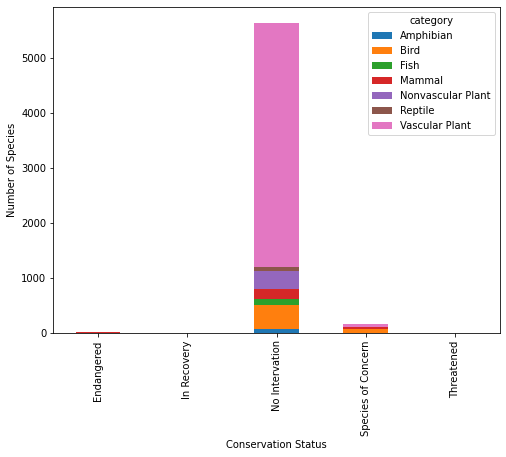

In [51]:
conservation_category.plot(kind="bar", figsize=(8,6), stacked=True)
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")

In [40]:
conservation_category.columns

Index(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile',
       'Vascular Plant'],
      dtype='object', name='category')

In [53]:
species_df["Protected"] = (species_df.conservation_status != "No Intervation")

In [78]:
Protected_cat = species_df.groupby(["category","Protected"]).scientific_name.count().reset_index().pivot(columns="Protected",\
                                                                                         index="category", \
                                                                                         values="scientific_name").reset_index()

Protected_cat.columns=['category', 'Not_Protected', 'Protected']
Protected_cat


,category,Not_Protected,Protected
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [79]:
Protected_cat['Percent Protected'] = Protected_cat.Protected/ (Protected_cat.Protected +Protected_cat.Not_Protected)
Protected_cat

,category,Not_Protected,Protected,Percent Protected
0,Amphibian,73,7,0.087500
1,Bird,442,79,0.151631
2,Fish,116,11,0.086614
3,Mammal,176,38,0.177570
4,Nonvascular Plant,328,5,0.015015
5,Reptile,74,5,0.063291
6,Vascular Plant,4424,46,0.010291


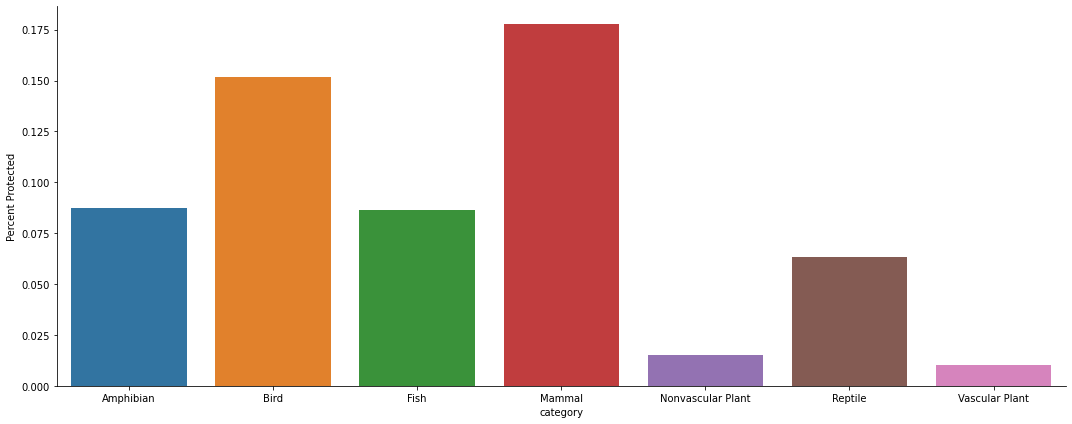

In [83]:
sns.catplot(data=Protected_cat, x="category", y="Percent Protected",kind="bar",height=6, aspect=2.5)

## Are mammals more protected than birds or reptiles?

In [85]:
from scipy.stats import chi2_contingency
cont1= [[38,176],[79,442]]
chi2_contingency(cont1)

(0.5810483277947567,
 0.445901703047197,
 1,
 array([[ 34.06530612, 179.93469388],
        [ 82.93469388, 438.06530612]]))

P-value is 0.445901703047197, so mammals are not significantly more protected than birds

In [86]:
cont2= [[38,176],[5,74]]
chi2_contingency(cont2)

(5.139702724228909,
 0.02338465214871547,
 1,
 array([[ 31.40614334, 182.59385666],
        [ 11.59385666,  67.40614334]]))

p-value is 0.02338465214871547, which means mammals are significantly more protected than reptiles

## Mammal types

In [87]:
species_df

,category,scientific_name,common_names,conservation_status,Protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervation,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervation,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervation,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervation,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervation,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervation,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervation,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervation,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervation,False


In [111]:
from itertools import chain
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text= text.replace(punctuation, '')
    text=text.lower()
    return text
    

    
mammal_types = species_df[species_df.category=="Mammal"].common_names.apply(remove_punctuation).str.split().tolist()

In [123]:
mammal_types_2 = []
for name in mammal_types:
    item = (list(dict.fromkeys(name)))
    mammal_types_2.append(item)
mammal_types_2[:6]

[['gappers', 'redbacked', 'vole'],
 ['american', 'bison'],
 ['aurochs', 'domestic', 'cattle', 'feral', 'domesticated'],
 ['domestic', 'sheep', 'mouflon', 'red', 'feral'],
 ['wapiti', 'or', 'elk'],
 ['whitetailed', 'deer']]

In [198]:
mammal_types_3= list(chain.from_iterable(i for i in mammal_types_2))


In [195]:
word_count = []
for i in mammal_types_3:
    x= mammal_types_3.count(i)
    word_count.append((i,x))

In [200]:
pd.DataFrame(set(word_count), columns=["Word", "Count"]).sort_values("Count", ascending=False)

,Word,Count
78,bat,23
157,shrew,18
165,myotis,17
186,mouse,16
41,chipmunk,13
...,...,...
80,pipistrelle,1
79,bushytailed,1
74,longlegged,1
73,gappers,1


In [211]:
species_df["is_bat"]=species_df.common_names.str.contains("Bat", regex=True)

In [213]:
species_df[species_df.is_bat].head()

,category,scientific_name,common_names,conservation_status,Protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervation,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervation,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervation,False,True


In [221]:
bat_observations = observations_df.merge(species_df[species_df.is_bat])
bat_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,Protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervation,False,True


In [224]:
bat_observations.groupby("park_name").observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3625
1,Great Smoky Mountains National Park,2513
2,Yellowstone National Park,8901
3,Yosemite National Park,5104


In [225]:
obs_by_park =bat_observations.groupby(["park_name", "Protected"]).observations.sum().reset_index()
obs_by_park

,park_name,Protected,observations
0,Bryce National Park,False,1788
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1401
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4583
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2663
7,Yosemite National Park,True,2441


Text(24.028385416666673, 0.5, 'Observations')

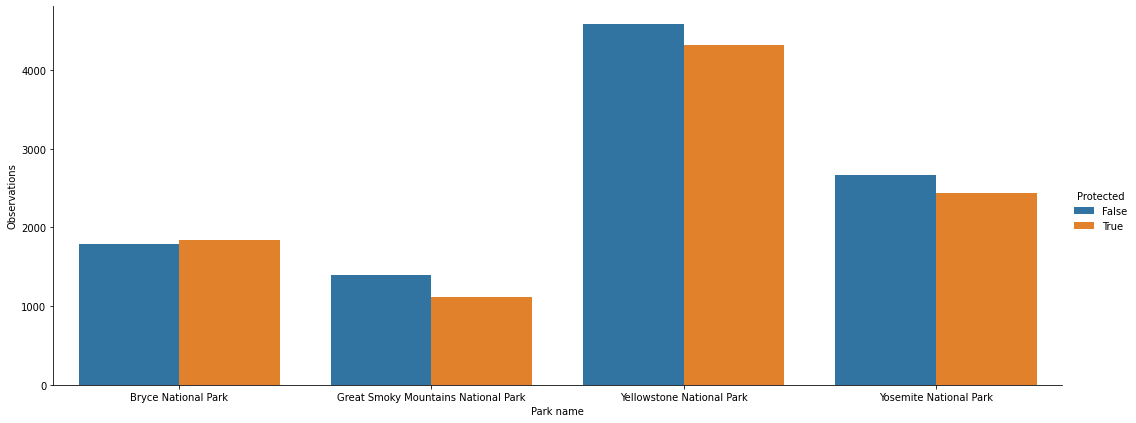

In [230]:
sns.catplot(data=obs_by_park, x="park_name", y="observations", hue="Protected", kind="bar", height=6, aspect=2.5)
plt.xlabel("Park name")
plt.ylabel("Observations")